# Football win/lose prediction

In this program, we are going to build an application to predict the result of soccer team base on their rated values.

For this application, we will group the soccer team rate by 5 categories:
- Coach
- Sticker
- Min-fielder
- Defender
- Goalkeeper

Where their range is from 0-100.

### Coding

### How to use the application

The application will allow user to input the rated range of team members and it will return the result: WIN/LOSE.

`PredictTeam([coach, stricker, stricker, mid_fielder, mid_fielder, mid_fielder, mid_fielder, defendere, defendere, defendere, defendere, goalkeeper])`

Ex: `PredictTeam([90,80,58,67,89,88,78,88,99,87,79,82]) = WIN`


Winning sample:
- [80,76,70,70,80,77,77,76,78,76,77,70]
- [80,80,80,75,75,70,70,75,77,77,77,88]
- [88,80,77,79,80,77,71,80,71,66,76,80]
- [88,80,70,80,77,76,75,74,71,66,67,65]
- [88,80,77,80,90,77,88,76,71,80,88,89]
- [88,80,78,88,87,69,77,80,71,66,67,70]
- [88,80,90,79,82,77,71,80,77,79,78,77]


Losing sample:
- [70,66,65,55,67,64,63,55,54,53,55,44]
- [60,80,80,75,65,70,70,55,67,47,69,66]
- [78,80,70,79,65,77,41,80,54,66,57,65]
- [75,50,60,55,54,53,45,53,61,66,47,90]
- [75,50,60,55,54,53,45,53,56,66,37,65]
- [70,71,60,70,65,60,60,65,67,66,56,61]
- [60,60,56,55,56,57,71,45,69,66,47,80]
- [65,65,70,54,54,55,50,57,65,66,51,60]

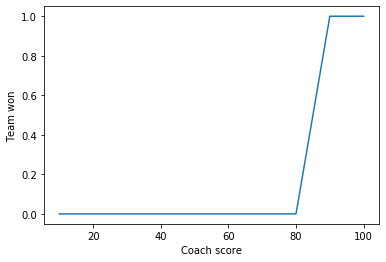

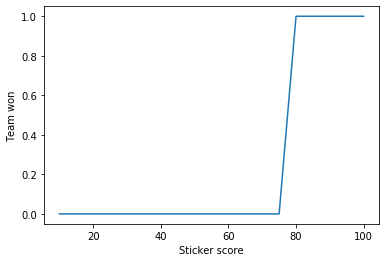

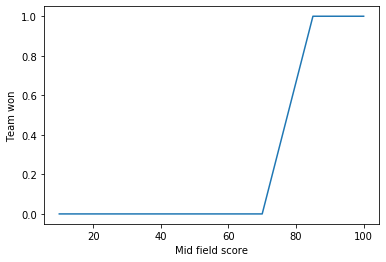

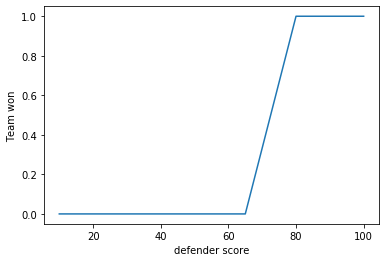

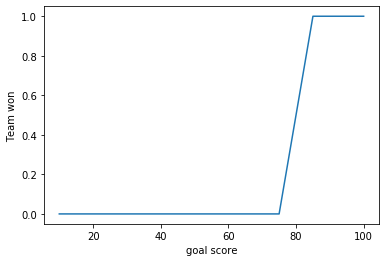

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([10, 20, 80, 85, 90, 100], [0, 0, 0, 0.5, 1, 1])
plt.ylabel('Team won')
plt.xlabel('Coach score')
plt.show()

plt.plot([10, 20, 75, 80, 90, 100], [0, 0, 0, 1, 1, 1])
plt.ylabel('Team won')
plt.xlabel('Sticker score')
plt.show()

plt.plot([10, 20, 70, 85, 90, 100], [0, 0, 0, 1, 1, 1])
plt.ylabel('Team won')
plt.xlabel('Mid field score')
plt.show()

plt.plot([10, 20, 65, 80, 90, 100], [0, 0, 0, 1, 1, 1])
plt.ylabel('Team won')
plt.xlabel('defender score')
plt.show()

plt.plot([10, 20, 75, 85, 90, 100], [0, 0, 0, 1, 1, 1])
plt.ylabel('Team won')
plt.xlabel('goal score')
plt.show()

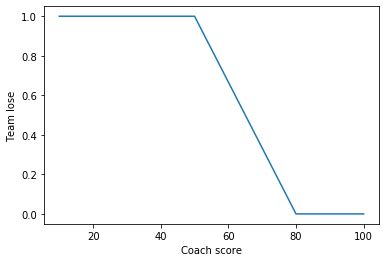

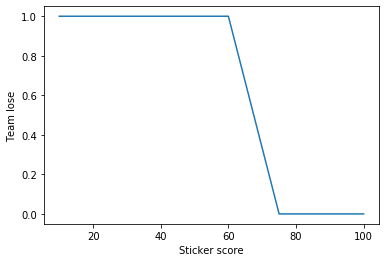

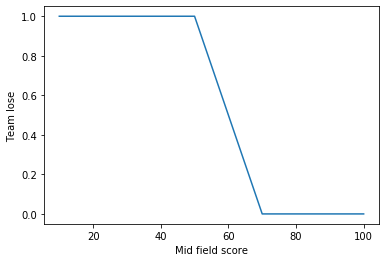

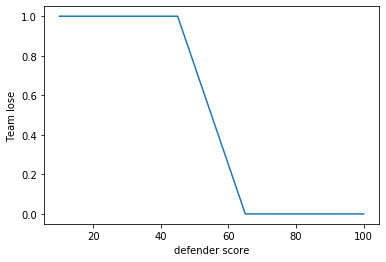

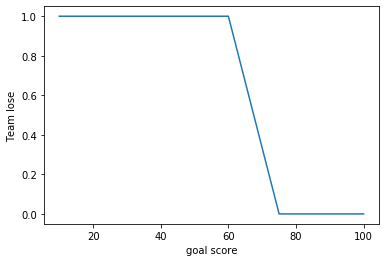

In [2]:
plt.plot([10, 20, 50, 80, 90, 100], [1, 1, 1, 0, 0, 0])
plt.ylabel('Team lose')
plt.xlabel('Coach score')
plt.show()

plt.plot([10, 20, 60, 75, 90, 100], [1, 1, 1, 0, 0, 0])
plt.ylabel('Team lose')
plt.xlabel('Sticker score')
plt.show()

plt.plot([10, 20, 50, 70, 90, 100], [1, 1, 1, 0, 0, 0])
plt.ylabel('Team lose')
plt.xlabel('Mid field score')
plt.show()

plt.plot([10, 20, 45, 65, 90, 100], [1, 1, 1, 0, 0, 0])
plt.ylabel('Team lose')
plt.xlabel('defender score')
plt.show()

plt.plot([10, 20, 60, 75, 90, 100], [1, 1, 1, 0, 0, 0])
plt.ylabel('Team lose')
plt.xlabel('goal score')
plt.show()

In [3]:
import numpy as np 

# win threshold
# coach
C_W_MIN =  80
C_W_MAX =  90
# sticker
S_W_MIN = 75
S_W_MAX = 85
# mid fielder
M_W_MIN = 70
M_W_MAX = 85
# defender
D_W_MIN = 65
D_W_MAX = 80
# goalkeeper
G_W_MIN = 75
G_W_MAX = 85

# lose threshold
# coach
C_L_MIN =  50
C_L_MAX = 80
# sticker
S_L_MIN = 60
S_L_MAX = 75
# mid fielder
M_L_MIN = 50
M_L_MAX = 70
# defender
D_L_MIN = 45
D_L_MAX = 65
# goalkeeper
G_L_MIN = 60
G_L_MAX = 75

def findB(x,y, m):
    b = y - (m * x)
    return b

def findM(x_max, x_min, y_max, y_min):
    x1 = x_max
    y1 = y_max
    x2 = x_min
    y2 = y_min
    m = (y2-y1)/(x2-x1)
    return m


def findScore(x, x_max,x_min, y_max, y_min):
    #  it will return value between 0-1
    m = findM(x_max,x_min, y_max, y_min)
    b = findB(x_max, y_max, m)
    y = (m * x) + b
    
    if y < 0:
        return 0
    if y > 1:
        return 1
    
    return y

def CalculateWinScore(arr_range):
    score = [0,0,0,0,0]
    score[0] = findScore(arr_range[0], C_W_MAX, C_W_MIN, 1, 0)
    
    s_range = (arr_range[1] + arr_range[2]) / 2
    score[1] = findScore(s_range, S_W_MAX, S_W_MIN, 1, 0)
    
    m_range = (arr_range[3] + arr_range[4] + arr_range[5] + arr_range[6]) / 4
    score[2] = findScore(m_range, M_W_MAX, M_W_MIN, 1, 0)
    
    d_range = (arr_range[7] + arr_range[8] + arr_range[9] + arr_range[10]) / 4
    score[3] = findScore(d_range, D_W_MAX, D_W_MIN, 1, 0)
    
    score[4] = findScore(arr_range[11], G_W_MAX, G_W_MIN, 1, 0)
    
    return score

def CalculateLoseScore(arr_range):
    score = [0,0,0,0,0]
    score[0] = findScore(arr_range[0], C_L_MAX, C_L_MIN, 0, 1)
    
    s_range = (arr_range[1] + arr_range[2]) / 2
    score[1] = findScore(s_range, S_L_MAX, S_L_MIN, 0, 1)
    
    m_range = (arr_range[3] + arr_range[4] + arr_range[5] + arr_range[6]) / 4
    score[2] = findScore(m_range, M_L_MAX, M_L_MIN, 0, 1)
    
    d_range = (arr_range[7] + arr_range[8] + arr_range[9] + arr_range[10]) / 4
    score[3] = findScore(d_range, D_L_MAX, D_L_MIN, 0, 1)
    
    score[4] = findScore(arr_range[11], G_L_MAX, G_L_MIN, 0, 1)
    
    return score


### Training
Train model with WIN/LOSE sample data

In [4]:
def WinScoreTemplate():
    samples = [[80,76,70,70,80,77,77,76,78,76,77,70],
            [80,80,80,75,75,70,70,75,77,77,77,88],
            [88,80,77,79,80,77,71,80,71,66,76,80],
            [88,80,70,80,77,76,75,74,71,66,67,65],
            [88,80,77,80,90,77,88,76,71,80,88,89],
            [88,80,78,88,87,69,77,80,71,66,67,70],
            [88,80,90,79,82,77,71,80,77,79,78,77]]
    total_score = [0,0,0,0,0]
    for sample in samples:
        score = CalculateWinScore(sample)
        total_score = np.sum([total_score, score], axis=0)

    return np.divide(total_score, len(total_score))

#     sample = [85,80,80,78,80,85,80,78,78,80,77,83]
#     return CalculateWinScore(sample)

def LoseScoreTemplate():
    
    samples = [[70,66,65,55,67,64,63,55,54,53,55,44],
                [60,80,80,75,65,70,70,55,67,47,69,66],
                [78,80,70,79,65,77,41,80,54,66,57,65],
                [75,50,60,55,54,53,45,53,61,66,47,90],
                [75,50,60,55,54,53,45,53,56,66,37,65],
                [70,71,60,70,65,60,60,65,67,66,56,61],
                [60,60,56,55,56,57,71,45,69,66,47,80],
                [65,65,70,54,54,55,50,57,65,66,51,60]]
    total_score = [0,0,0,0,0]
    for sample in samples:
        score = CalculateLoseScore(sample)
        total_score = np.sum([total_score, score], axis=0)

    return np.divide(total_score, len(total_score))
    
#     sample = [77,66,65,55,60,60,60,55,54,53,55,44]
#     return CalculateLoseScore(sample)


WinTemplate = WinScoreTemplate()
LoseTemplate = LoseScoreTemplate()
print(WinTemplate)
print(LoseTemplate)

[0.8        0.52       0.71333333 0.92333333 0.54      ]
[0.58       0.95333333 0.82       0.5225     0.97333333]


In [5]:
### score comparation
def DegreeOfEquivalence(input, template):
    #Degree of Equivalence: u(A,B) = & (ua(x) <->ub(x))
    results = np.zeros(len(input))
    for i in range(len(input)):
        A = input[i]
        B = template[i]
        AB = min(max(1 - A, B), max(A, 1 - B))
        results[i] = AB
   
    return min(results)

### Testing

In [6]:
win_data = CalculateWinScore([90,90,90,95,95,90,90,95,97,97,97,98])
resultWin = DegreeOfEquivalence(win_data, WinTemplate)
print(win_data)
print(WinTemplate)
print(resultWin)

lose_data = CalculateLoseScore([65,65,50,54,54,55,50,77,65,66,61,60])
resultLose = DegreeOfEquivalence(lose_data, LoseTemplate)
print(lose_data)
print(LoseTemplate)
print(resultLose)


[1.0, 1, 1, 1, 1]
[0.8        0.52       0.71333333 0.92333333 0.54      ]
0.5200000000000002
[0.5, 1, 0.8374999999999999, 0, 1.0]
[0.58       0.95333333 0.82       0.5225     0.97333333]
0.4775000000000005


### Prediction

In [7]:
def PredictWining(arr_score):
    win_data = CalculateWinScore(arr_score)
    resultWin = DegreeOfEquivalence(win_data, WinTemplate)
    print(resultWin)
    if resultWin >= 0.5:
        return "WIN"
    
    return "LOSE"

def PredictLosing(arr_score):
    lose_data = CalculateLoseScore(arr_score)
    resultLose = DegreeOfEquivalence(lose_data, LoseTemplate)
    print(resultLose)
    if resultLose >= 0.5:
        return "LOSE"
    
    return "WIN"

In [8]:
result1 = PredictWining([65,65,50,54,54,55,50,40,65,56,58,60])
result2 = PredictWining([90,90,90,95,95,90,90,95,97,97,97,98])
print('[65,65,50,54,54,55,50,77,65,66,61,60] = ' + result1)
print('[90,90,90,95,95,90,90,95,97,97,97,98] = ' + result2)

0.07666666666666655
0.5200000000000002
[65,65,50,54,54,55,50,77,65,66,61,60] = LOSE
[90,90,90,95,95,90,90,95,97,97,97,98] = WIN


In [9]:
result1 = PredictLosing([65,65,50,54,54,55,50,40,65,56,58,60])
result2 = PredictLosing([90,90,90,95,95,90,90,95,97,97,97,98])
print('[65,65,50,54,54,55,50,77,65,66,61,60] = ' + result1)
print('[90,90,90,95,95,90,90,95,97,97,97,98] = ' + result2)

0.5
0.026666666666666616
[65,65,50,54,54,55,50,77,65,66,61,60] = LOSE
[90,90,90,95,95,90,90,95,97,97,97,98] = WIN
